<a href="https://colab.research.google.com/github/Prem-ds/Linear_Regression/blob/main/Image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

# Step 1: Read existing CSV data
with open('dept.csv', mode='r') as infile:
    reader = list(csv.reader(infile))
    header = reader[0]
    rows = reader[1:]

# Step 2: Add new column to header and each row
new_header = header + ['Empsal']
new_rows = [row + [3000] for row in rows]

new_header1 = header + ['Revsal']
new_rows1 = [row + [3900] for row in rows]

# Step 3: Write updated data to a new CSV (or overwrite the original)
with open('updated_source1.csv', mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(new_header)
    writer.writerows(new_rows)
with open('updated_source1.csv', mode='w', newline='') as outfile1:
    writer = csv.writer(outfile1)
    writer.writerow(new_header1)
    writer.writerows(new_rows1)

print("New columns added successfully!")


New columns added successfully!


In [ ]:
##step 1 -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns



In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("Training data shape:", x_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)


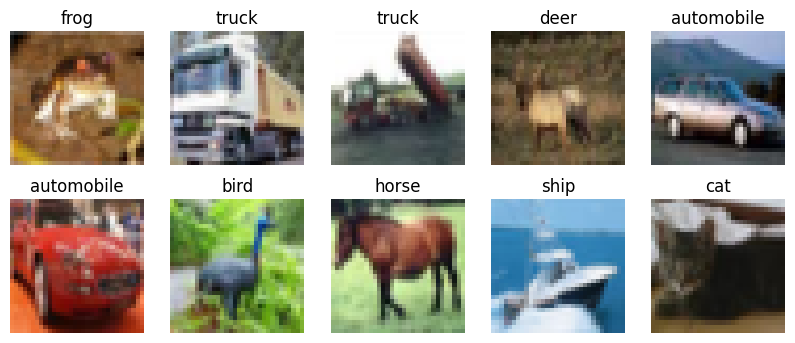

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,4))
#for i in range(10):
#plt.subplot(2,5,i+1)
#plt.imshow(x_train[i], interpolation="nearest")
#plt.title(class_names[y_train[i][0]])
#plt.axis("off")
#plt.show()

# Step 3
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], interpolation="nearest")
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # works with integer labels
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3421 - loss: 1.7596 - val_accuracy: 0.5217 - val_loss: 1.3137
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5705 - loss: 1.2083 - val_accuracy: 0.6284 - val_loss: 1.0544
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6375 - loss: 1.0342 - val_accuracy: 0.6648 - val_loss: 0.9688
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.6693 - loss: 0.9327 - val_accuracy: 0.6533 - val_loss: 1.0020
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7024 - loss: 0.8541 - val_accuracy: 0.6813 - val_loss: 0.9119
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7216 - loss: 0.7990 - val_accuracy: 0.6858 - val_loss: 0.9080
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.7405 - loss: 0.7393 - val_accuracy: 0.6647 - val_loss: 0.9516
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7517 -

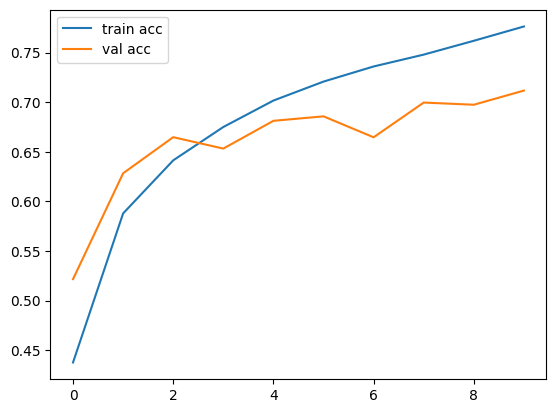

313/313 - 4s - 14ms/step - accuracy: 0.7118 - loss: 0.8598
Test accuracy: 0.71


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")
